In [64]:
extract_path='C4MIP_data/c4mip_cmip6_ascii_files_11_models'

In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
def process_variable_data(file_path, column_name):
    try:
        df = pd.read_csv(file_path, delim_whitespace=True, index_col=0, engine='python')
        if column_name in df.columns:
            return df[column_name]
        else:
            return None
    except Exception as e:
        return None

def round_down_index(df):
    df.index = df.index.astype(int)
    return df.groupby(level=0).first()

variables = ['CO2', 'LA_CO2_FLUX', 'OA_CO2_FLUX', 'ST']
data_frames = {var: {} for var in variables}

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('_COU.txt'):
            model_name = file.split('_')[0]
            print(model_name)
            file_path = os.path.join(root, file)
            for var in variables:
                var_column = process_variable_data(file_path, var)

                if var_column is not None:
                    if model_name in data_frames[var]:
                        data_frames[var][model_name] = pd.concat([data_frames[var][model_name], var_column], axis=1).mean(axis=1)
                    else:
                        data_frames[var][model_name] = var_column
                else:
                    print('Variable {} not found in {}'.format(var, file_path))

dfs = {var: round_down_index(pd.DataFrame(data_frames[var]).groupby(level=0).first()) for var in variables}


CESM2
ACCESS-ESM1.5
GFDL
NorESM2LM
CanESM5
BCC
UKESM
CNRM-ESM2.1
JAMSTEC
MPIESM
IPSL


/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_28518/2490496200.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, index_col=0, engine='python')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_28518/2490496200.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, index_col=0, engine='python')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_28518/2490496200.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, index_col=0, engine='python')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_28518/2490496200.py:

In [78]:
df_oa=dfs['OA_CO2_FLUX']
df_la=dfs['LA_CO2_FLUX']
df_co2=dfs['CO2']
df_tas=dfs['ST']

In [79]:
scon=np.sign(df_oa.cumsum().iloc[100])
df_oa = df_oa * scon
df_la = df_la * scon

In [80]:
c_emis=(((df_co2-df_co2.iloc[0]).diff()*2.13)+df_la+df_oa)



<Axes: >

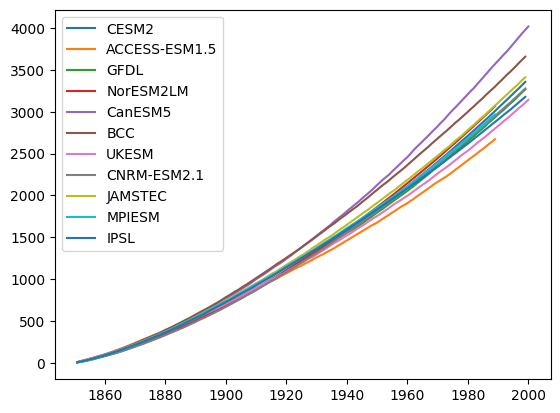

In [81]:
c_emis.cumsum().plot()

In [82]:
c_emis.index=c_emis.index-1850

In [83]:
mdls1=c_emis.columns

In [121]:
ce_1000=c_emis.copy()
for m in mdls1:
    ce_1000.loc[ce_1000[m].cumsum()>1000,m]=np.nan

In [123]:
mdlmap={}
mdlmap['ACCESS-ESM1-5']='ACCESS-ESM1.5'
mdlmap['CESM2']='CESM2'
mdlmap['CNRM-ESM2-1']='CNRM-ESM2.1'
mdlmap['GFDL-ESM4']='GFDL'
mdlmap['MPI-ESM1-2-LR']='MPIESM'
mdlmap['NorESM2-LM']='NorESM2LM'
mdlmap['UKESM']='UKESM'

In [124]:
usmdls=list(mdlmap.keys())

<Axes: >

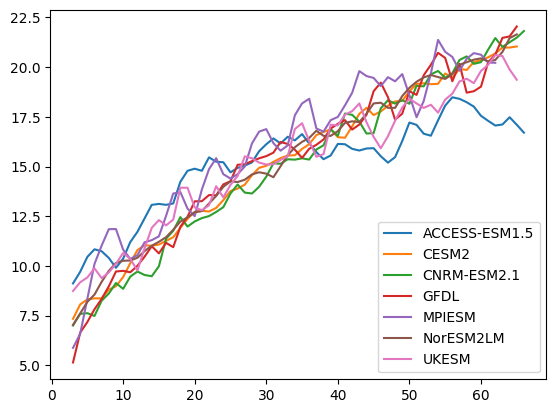

In [137]:

ce_1000.filter([mdlmap[m] for m in usmdls]).rolling(window=3).mean().plot()

